## Dunn & Koo Figure 1

In [1]:
import sys
sys.path.append('/usr/lib/python3/dist-packages/')
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import h5py
import conutils
import random
from six.moves import cPickle
import seaborn as sns


from graph_tool.all import *

%matplotlib inline

In [2]:
# Load in sample data set and network positions
# Find data at https://www.kaggle.com/c/connectomics/data
#
filename = '../../Tensor/kaggle_connect_data/normal_dataset.hdf5'
group_name = ['normal_data']
dataset = h5py.File(filename,'r')
%time F_1 = np.array(dataset['/'+group_name[0]+'/F_2'])
scores_1 = np.array(dataset['/'+group_name[0]+'/scores_2'])

pos = '../../Tensor/kaggle_connect_data/normal-1/networkPositions_normal-1.txt'
pos_1 = np.loadtxt(pos,delimiter=',')

CPU times: user 125 ms, sys: 938 ms, total: 1.06 s
Wall time: 1.09 s


# Figure 1b

Hierarchal plot of network connectivity that accentuates the presence of subnetworks

In [3]:
# Construct graph object using a randomly selected group of 400 neurons
#
seed = 19332
np.random.seed(seed)
random.seed(seed)

g = Graph()

inds = np.random.randint(0,1000,400)
pos = pos_1[inds,:]
scores = scores_1[inds,:]
scores = scores[:,inds]

for i in range(pos.shape[0]):
    g.add_vertex()
for i in range(pos.shape[0]):
    for j in range(pos.shape[0]):
        if scores[i,j] == 1:
            g.add_edge(g.vertex(i), g.vertex(j))

In [4]:
# Attempt to cluster subnewtorks
#
state = minimize_nested_blockmodel_dl(g, deg_corr=True,B_min=10,B_max=10)

In [5]:
# If the graph object has already been created & clustered:
#
savefile = './figure1b.pickle'
f = open(savefile, 'rb')
xx = cPickle.load(f)
f.close()

state = xx[0]
g = xx[1]
pos = xx[2]

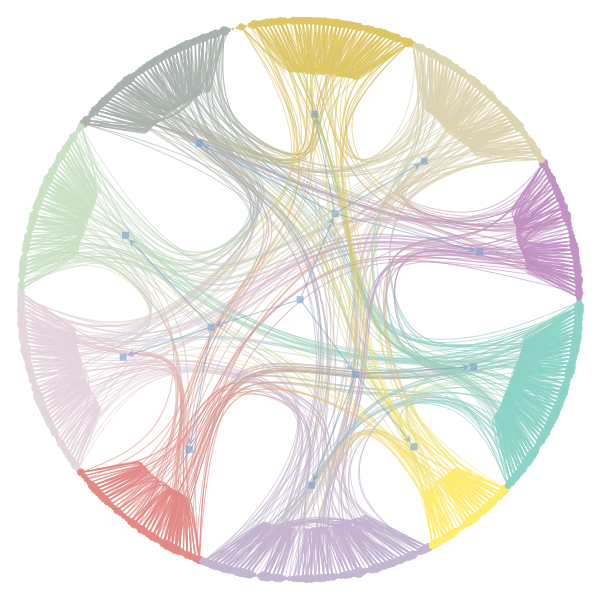

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9063d21ef0, at 0x7f90a2f7f470>,
 <Graph object, directed, with 414 vertices and 413 edges at 0x7f90a2f7f080>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f90a2f7f080, at 0x7f90a2f63e10>)

In [6]:
# Plot
#
state.draw(pos=pos,output='figure1b.pdf')

# Figure 1c

Two example fluorescence traces, with frames that pass threshold criteria indicated as dots.

In [7]:
# Set filters based on activity threshold of 20 across the entire population
#
F_1 = F_1.T
fdiff = np.diff(F_1,axis=1)
totF = np.sum(fdiff,axis=0)
fluor = fdiff[:,totF>20]
fluor2 = F_1[:,totF>20]

/home/twd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 179500 but corresponding boolean dimension is 179499


In [8]:
# Find indices with which to plot black spots of thresholded time points
#
indies = np.where(totF>20)
indies = indies[0]
indies = indies[indies<3000]

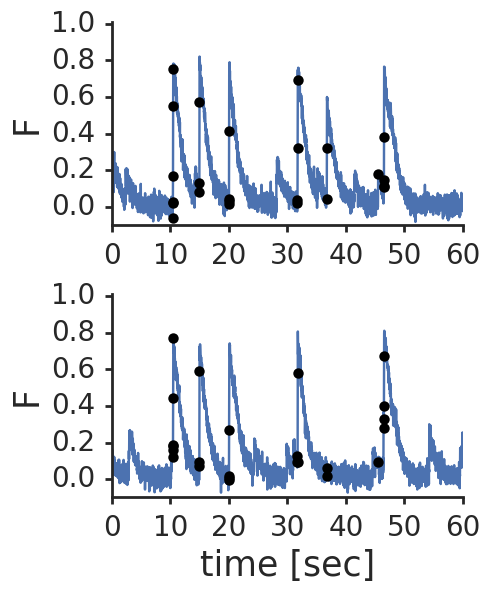

In [10]:
# Make plot
#
sns.set_style("white", {"xtick.major.size": "5", "ytick.major.size": "5",'axes.linewidth': 2})

time = np.linspace(0,60,3000)

ax = plt.figure(figsize=(5,6))
plt.subplot(211)
plt.plot(time,F_1[1,:3000])
plt.plot(time[indies],F_1[1,indies],'k.',markersize=15)
plt.xlim([0, 60])
plt.ylim([-0.1, 1.01])
plt.ylabel('F',size=25)
ax = plt.gca()
ax.tick_params(width=2,labelsize=20)
sns.despine()

plt.subplot(212)
plt.plot(time,F_1[0,:3000])
plt.plot(time[indies],F_1[0,indies],'k.',markersize=15)
plt.xlim([0, 60])
plt.ylim([-0.1, 1.01])
plt.ylabel('F',size=25)
plt.xlabel('time [sec]',size=25)
ax = plt.gca()
ax.tick_params(width=2,labelsize=20)
plt.tight_layout()
sns.despine()

plt.savefig('figure1c.pdf')